# Inaugural Project

Imports packages and our Python file:

In [1]:
#Import different packages

import numpy as np
import matplotlib.pyplot as plt 


# Autoreload of our model 
%load_ext autoreload
%autoreload 2

# Import our code
import HouseholdSpecializationModel as model

# Initialize class
hsm = model.HouseholdSpecializationModelClass()

#Defining beta
beta = '\u03B2'

# Question 1

We are printing a tabel with the results based on the HouseholdSpecilizationModel code

In [2]:
hsm.print_table_q1()

c:\Users\Bruger\IntroProg\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:84: RuntimeWarning: divide by zero encountered in reciprocal
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+
c:\Users\Bruger\IntroProg\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:85: RuntimeWarning: divide by zero encountered in reciprocal
  par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Table of HF/HM values:
Alpha/Sigma     0.50    1.00    1.50
----------------------------------------
      0.25 |    0.55    0.31    0.21
      0.50 |    1.00    1.00    1.00
      0.75 |    1.83    3.25    4.67


Higher productive for women will lead to women are working more in the home. 

The most productive side in the home will have relative more work in the home for a higher 
degree of substitution. 

# Question 2

We are using our code from the HouseholdSpecializationModel and printing results.

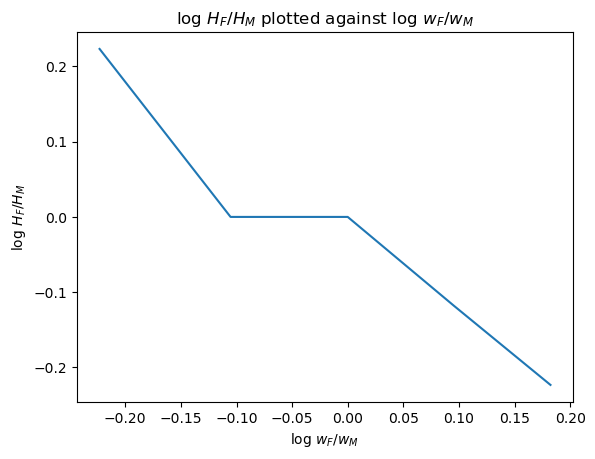

In [3]:
# a. First we create a figure object by initializing the plt.figure
fig = plt.figure() 

# b. We only add one subplot so the ax is basically the entire figure.
ax = fig.add_subplot(1,1,1) 


ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=True)) 
#x-axis: we plot log(wF_vec), since wM is fixed at 1 (i.e. a numeraire)
#Note: we only take the log here, so we don't need to store the log values
#y-axis: We call the solve_wF_vec method from our class directly as the returns the value. 
#Note: Here we call the discrete solving method, where the continuous will be implemented in exercise 3. 

ax.set_title('log $H_F/H_M$ plotted against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #labelling x-axis
ax.set_ylabel('log $H_F/H_M$'); #labelling y-axis

**Note:** We see that a higher relative for women does that the work more at home. 

If the wage is the same the hours in the home is the same. 

# Question 3

We are using the code for continuous as the hours are not longer discrete

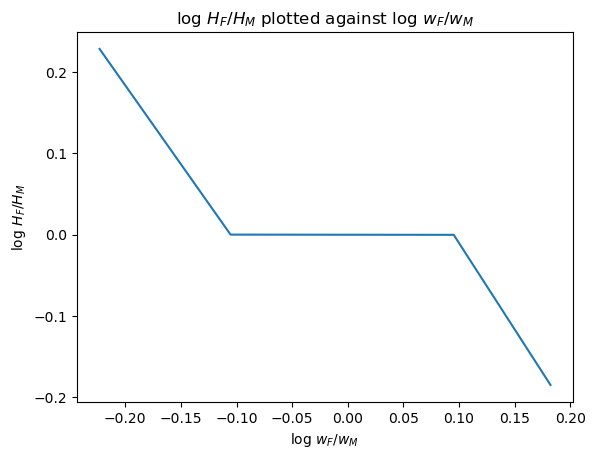

In [4]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=False)) 
#x-axis: we plot log(wF_vec), since wM is fixed at 1 (i.e. a numeraire)
#y-axis: We call the solve_wF_vec method from our class directly as the returns the value. 
#We call discrete = False, because we want it to use the
#continous solving method.

ax.set_title('log $H_F/H_M$ plotted against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #labelling x-axis
ax.set_ylabel('log $H_F/H_M$'); #labelling y-axis

**Note:** The result depends heavily on the initial guess. We have made an initial guess that men and women work 
6 hours at work and at home each. 

# Question 4

We are solving this question by looping over different values for alpha and sigma, 
and then returning the minimum value for the target function

In [5]:
#Setting the initial best for the target score.
target_best=10**6
#Setting initial values for alpha and sigma. 
alpha_best=0
sigma_best=0

#Making variables for beta
beta0_best=0
beta1_best=1

#Making initial vector for our results. 
log_HF_HM_best=np.zeros(hsm.par.wF_vec.size)

#Making a loop over alpha and sigma. We use a narrow interval in order to save time. 
for i, alpha in enumerate(np.linspace(0.5,1.0,30)):
    hsm.par.alpha=alpha
    for j, sigma in enumerate(np.linspace(0.0,1,30)): 
        hsm.par.sigma=sigma

        #Running the regression defined. 
        hsm.run_regression()

        #Calculating the target
        target_new=(hsm.par.beta0_target-hsm.opt.beta0)**2+(hsm.par.beta1_target-hsm.opt.beta1)**2

        #Check if the new measure is better than the old
        if target_new<target_best:
            target_best=target_new
            alpha_best=alpha
            sigma_best=sigma
            beta0_best=hsm.opt.beta0
            beta1_best=hsm.opt.beta1
            log_HF_HM_best=hsm.solve_wF_vec(discrete=False)

        #Keeping the value if the new guess is not better. 
        else: 
            target_best=target_best
            alpha_best=alpha_best
            sigma_best=sigma_best
            beta0_best=beta0_best
            beta1_best=beta1_best
            log_HF_HM_best=log_HF_HM_best


#Resetting values
hsm.par.alpha=0.5
hsm.par.sigma=1.0
hsm.par.wF=1.0

c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:84: RuntimeWarning: divide by zero encountered in double_scalars
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+
c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:84: RuntimeWarning: overflow encountered in double_scalars
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+
c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:84: RuntimeWarning: invalid value encountered in double_scalars
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+
c:

In [6]:
#We are printing optimal values for alpha and sigma. 
print(f'Optimal value of alpha = {alpha_best:.2f}')
print(f'Optimal value of sigma = {sigma_best:.2f}')
print(f'Optimal value of {beta}_0 = {beta0_best:.2f}')
print(f'Optimal value of {beta}_1 = {beta1_best:.2f}')
print(f'Value of target function = {target_best:.2f}')


Optimal value of alpha = 0.98
Optimal value of sigma = 0.10
Optimal value of β_0 = 0.41
Optimal value of β_1 = -0.11
Value of target function = 0.00


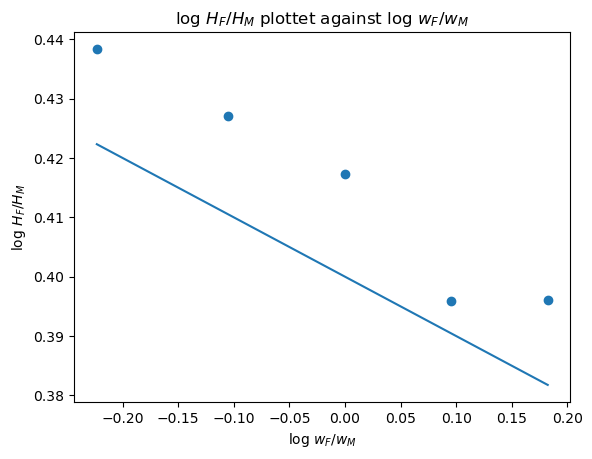

In [7]:
# a. create the figure
fig = plt.figure() 

# b. plot
ax = fig.add_subplot(1,1,1) 


ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec)) 
#x-axis: Same as in question 2 and 3
#y-axis: We are plotting the function from the paper.

ax.scatter(np.log(hsm.par.wF_vec),log_HF_HM_best) 
#We are making our vector as a scatter plot to compare the results. 

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

We can see our estimates are fairly in line with the empirical paper. Interestingly in order to get this, 
we get a value of alpha equal to 0.97. Which suggest that women are 32 times more productive at home than men. 
Further, we get a low elasticity of substitution. One option could therefore be that our model have left out
important factors. 

The low degree of substitution is also the reason for a flat slope compared to exercise 2 and 3
as it more difficult for households to react on changes in the relative wages. 

# Question 5

We are first assuming that alpha is equal to 1/2. Then we are checking whether this are fitting with the data or not. The first part is therefore a simplication of question 4, and therefore explaninations can be found in question 4

After this we make an extension of the model

In [8]:

target_best_5=10**6

alpha_best_5=0
sigma_best_5=0


beta0_best_5=0
beta1_best_5=1

log_HF_HM_best_5=np.zeros(hsm.par.wF_vec.size)

for j, sigma in enumerate(np.linspace(0.0,1.5,100)): 
    hsm.par.sigma=sigma
    hsm.run_regression()
    target_new_5=(hsm.par.beta0_target-hsm.opt.beta0)**2+(hsm.par.beta1_target-hsm.opt.beta1)**2
    if target_new_5<target_best_5:
        target_best_5=target_new_5
        sigma_best_5=sigma
        log_HF_HM_best_5=hsm.solve_wF_vec(discrete=False)
        beta0_best_5=hsm.opt.beta0
        beta1_best_5=hsm.opt.beta1
            
    else: 
        target_best_5=target_best_5
        sigma_best_5=sigma_best_5
        log_HF_HM_best_5=log_HF_HM_best_5
        beta0_best_5=beta0_best_5
        beta1_best_5=beta1_best_5

#Returning values
hsm.par.sigma=1.0
hsm.par.wF=1.0

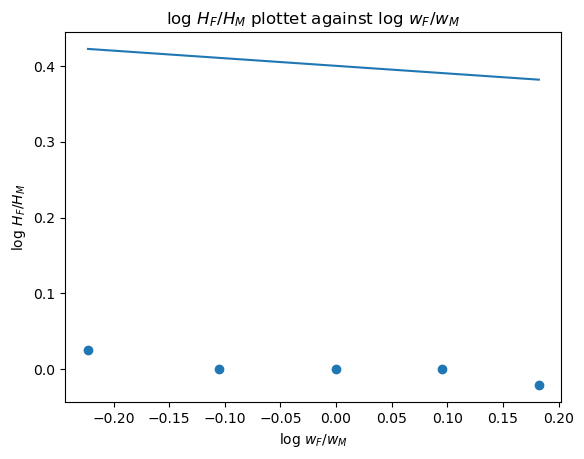

In [9]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.par.beta0_target+hsm.par.beta1_target*np.log(hsm.par.wF_vec))
ax.scatter(np.log(hsm.par.wF_vec),log_HF_HM_best_5) 


ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

If alpha is assumed to be 0.5, then we assume that productivity for working at home is the same for both men and women. If the productivity is different, which question 4 suggest, then this assumption will result in a poorer fit, because in question 4 we find that women are more productive than men, since alpha was 0.9.

However, it could also be that the productivity is the same, but the model is misspecified. One reason could be expectations for the society that the woman is expected to work more at home than the man. This is not taken care off in our model